<a href="https://colab.research.google.com/github/yanaySG/Blockchain_Practica3/blob/master/indoor_positioning_presence_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import json as json
import itertools as itr
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# read the log file into a list of strings
with open('presence.log', 'r') as file:
    log_list = file.readlines()

# create a DataFrame from the log 
df = pd.DataFrame({'log': log_list})

# convert all rows to dictionaries
df['data_dict'] = df['log'].apply(json.loads)

# create a new dataframe with the keys of the dictionaries as column names
new_df = pd.DataFrame(list(df['data_dict'].values), columns=df['data_dict'].iloc[0].keys())

# get all unique keys from the data_dict column
# all_keys = set(itr.chain.from_iterable(df['data_dict']))
all_keys = list(OrderedDict.fromkeys(itr.chain.from_iterable(df['data_dict'])))

# create a new DataFrame using all the keys
new_df = pd.DataFrame([{key: row.get(key, None) for key in all_keys} for row in df['data_dict']])

display(new_df.head())

,ap_macaddr,associated,associated_by_reported_device,client_auth_type,client_connection,client_ipaddr,client_macaddr,client_manufacturer,client_name,client_os_type,...,site_name,site_state,site_zipcode,ssid,timestamp,customer_name,device_level,device_model,device_type,path
0,a8:5b:f7:cf:16:b8,True,False,STATEFUL_RADIUS,,10.83.203.194,20:4c:03:6f:02:13,,,,...,0200-EESS-PRO-ED RBLA CATALUNYA,Cataluna,08008,,1683059719,None,None,None,None,None
1,6c:c4:9f:c8:dd:76,True,False,STATEFUL_RADIUS,,10.42.93.151,76:c1:94:64:7f:52,,,,...,4293-OFIC-PRO,Pais Vasco,48980,,1683059719,Banc Sabadell,23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258-...,AP-505-RW,AP,[23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258...
2,60:26:ef:cf:f6:0c,True,False,STATEFUL_RADIUS,,10.6.59.121,7a:9c:20:f7:7e:e9,,,,...,0659-OFIC-PRO,Andalucia,18005,,1683059719,Banc Sabadell,23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258-...,AP-505-RW,AP,[23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258...
3,6c:c4:9f:cc:a2:b4,True,False,STATEFUL_RADIUS,,10.52.62.186,b2:5d:a4:67:40:90,,,,...,5262-OFIC-PRO,Cataluna,8820,,1683059719,Banc Sabadell,23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258-...,AP-505-RW,AP,[23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258...
4,6c:c4:9f:c8:d9:9e,True,False,MAC_AUTH,,10.2.82.111,8a:70:fa:da:5e:44,,,,...,0282-OFIC-PRO,Cataluna,25200,,1683059719,Banc Sabadell,23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258-...,AP-505-RW,AP,[23f24570-d2c9-4e6e-a833-3d1734e110c8.d91a3258...


ap_macaddr, device_ipaddr, rssi

In [4]:
print(new_df.columns)

Index(['ap_macaddr', 'associated', 'associated_by_reported_device',
       'client_auth_type', 'client_connection', 'client_ipaddr',
       'client_macaddr', 'client_manufacturer', 'client_name',
       'client_os_type', 'client_radio_macaddr', 'client_role', 'client_type',
       'client_username', 'customer_id', 'device_group_name', 'device_id',
       'device_ipaddr', 'device_name', 'device_public_ipaddr', 'device_site',
       'event_source', 'event_type', 'noise_floor', 'radio_macaddr', 'rssi',
       'site_address', 'site_city', 'site_coordinates', 'site_country',
       'site_id', 'site_name', 'site_state', 'site_zipcode', 'ssid',
       'timestamp', 'customer_name', 'device_level', 'device_model',
       'device_type', 'path'],
      dtype='object')


In [5]:
# ap_macaddr, device_ipaddr, rssi

df_imp_vars = new_df[['ap_macaddr', 'client_macaddr', 'rssi']]
print(df_imp_vars.describe(), '\n')
print(df_imp_vars.describe(include=['object']))

               rssi
count  10000.000000
mean     -68.180800
std       11.924082
min     -107.000000
25%      -74.000000
50%      -66.000000
75%      -60.000000
max      -21.000000 

               ap_macaddr     client_macaddr
count               10000              10000
unique               1479               1794
top     34:8a:12:c7:bd:5e  20:4c:03:6e:40:93
freq                  117                 31


In [6]:
print(df_imp_vars.ap_macaddr.value_counts(), '\n')
print(df_imp_vars.client_macaddr.value_counts()) 

34:8a:12:c7:bd:5e    117
34:8a:12:c7:bd:7c    112
34:8a:12:c7:bd:a8     83
6c:c4:9f:c8:bd:e0     46
a8:5b:f7:c2:ba:ae     40
                    ... 
48:2f:6b:cd:89:aa      1
cc:88:c7:c5:70:e4      1
60:26:ef:cf:e3:94      1
cc:88:c7:c5:71:d2      1
6c:c4:9f:c8:b1:6c      1
Name: ap_macaddr, Length: 1479, dtype: int64 

20:4c:03:6e:40:93    31
ec:2e:98:c4:63:f1    27
34:7d:f6:ff:6a:18    21
20:4c:03:6e:55:d3    19
34:7d:f6:9d:e3:bf    19
                     ..
22:e6:23:0c:c9:b4     1
12:d9:11:af:d8:ef     1
34:7d:f6:fd:e3:91     1
34:7d:f6:fe:d8:55     1
34:7d:f6:fe:9c:37     1
Name: client_macaddr, Length: 1794, dtype: int64


In [7]:
# Filter the data for the desired access point
access_point = ['6c:c4:9f:c8:bd:e0','a8:5b:f7:c2:ba:ae']

access_point = '6c:c4:9f:c8:bd:e0'

data = df_imp_vars.loc[df_imp_vars['ap_macaddr'] == access_point]

# Create a pivot table to organize the data by location and device MAC address
table = pd.pivot_table(df_imp_vars.sample(n=100), values='rssi', index=['ap_macaddr'], columns=['client_macaddr'])

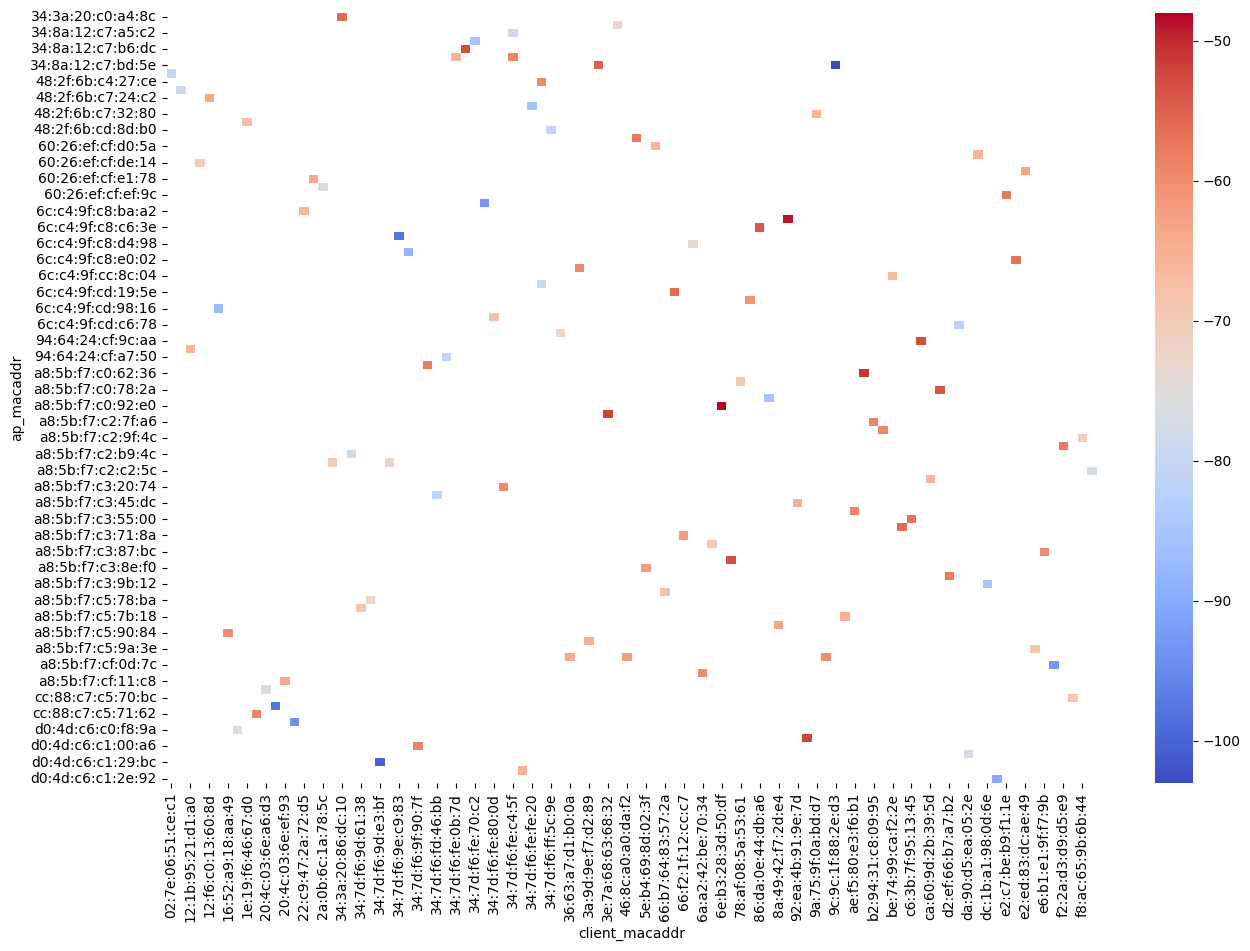

In [8]:
# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(table, cmap='coolwarm', ax=ax)

#sns.heatmap(table, cmap='coolwarm', annot=False, fmt="d", linewidths=.01, linecolor='w', ax=ax)

# Show the plot
plt.show()

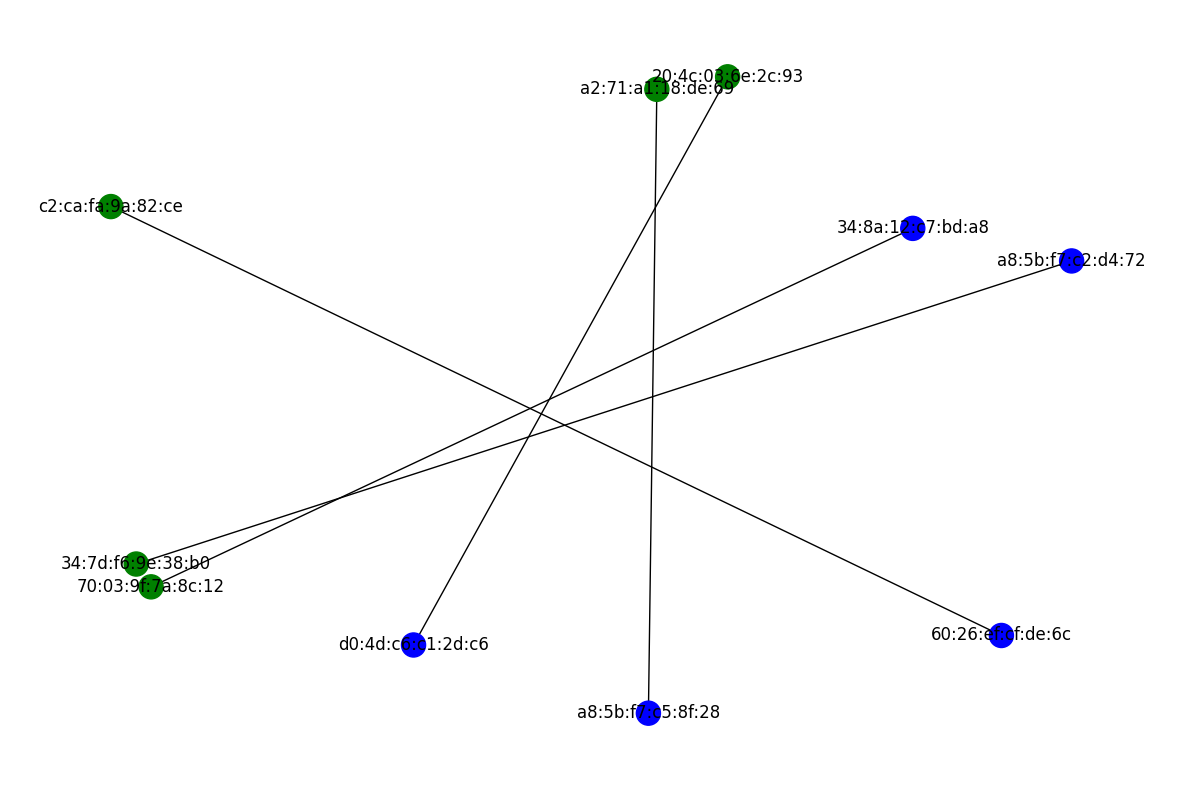

In [141]:
####### PLACING DATA IN A GENERAL GRAPH ######

# create an empty graph
G = nx.Graph()

# get sample of data
#df_test = df_imp_vars[df_imp_vars.ap_macaddr== '34:8a:12:c7:bd:5e'] 
df_test = df_imp_vars.sample(n=5)
df_test = df_test.drop_duplicates()


# add nodes to the graph
G.add_nodes_from(df_test['ap_macaddr'])
G.add_nodes_from(df_test['client_macaddr'])


# add edges to the graph with weights
for index, row in df_test.iterrows():
    G.add_edge(row['ap_macaddr'], row['client_macaddr'], weight=row['rssi'])


# for coloring edges
sources = list(df_test.ap_macaddr)
targets = list(df_test.client_macaddr)

color_map = []
for node in G:
    if node in sources:
        color_map.append('blue')
    elif node in targets:
        color_map.append('green')
    else:
        color_map.append('red')


# visualize the graph
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(G, with_labels=True, node_color=color_map)
plt.show()

#print(nx.adjacency_matrix(G))

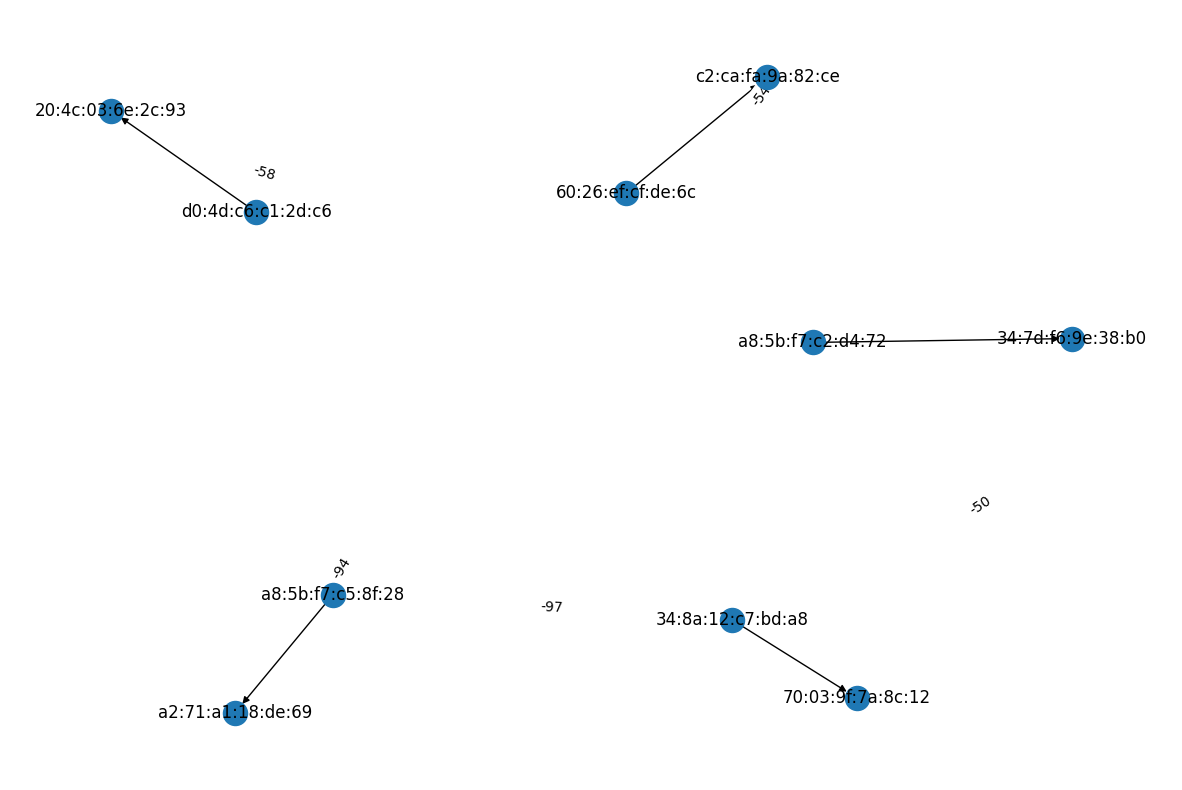

In [143]:
####### PLACING DATA IN A DIRECTED GRAPH ######

DG = nx.from_pandas_edgelist(
    df_test, source='ap_macaddr', target='client_macaddr', edge_attr='rssi', 
    create_using=nx.DiGraph())

# for coloring edges
sources = list(df_test.ap_macaddr)
targets = list(df_test.client_macaddr)

# set the positions of the nodes for better visualization
pos = nx.spring_layout(DG)

# draw the graph with labels and weights
fig, ax = plt.subplots(figsize=(15, 10))
nx.draw(DG, with_labels=True)
edge_labels = nx.get_edge_attributes(DG, 'rssi')
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels )

plt.show()


# print the weights of each edge
#for u, v, weight in DG.edges.data('rssi'):
#    print(f"({u}, {v}, {weight})")

some notes:

Indoor positioning using fingerprinting is a technique that involves collecting a set of Wi-Fi signal strength measurements at various locations within a building, and using this data to train a machine learning model. The model can then be used to predict a person's location within the building based on the Wi-Fi signals that their device is currently receiving.

Here is a high-level algorithm for creating an indoor positioning system using fingerprinting in Python:

Collect training data: Use a mobile device to collect a set of Wi-Fi signal strength measurements at various locations within the building. This data should be labeled with the corresponding location.

Preprocess the data: Clean and preprocess the data to remove any noise or outliers. You may also need to transform the data into a format that can be used by machine learning algorithms.

Train a model: Use the preprocessed data to train a machine learning model. There are many different algorithms that can be used for this task, including k-NN, SVM, and neural networks.

Evaluate the model: Test the accuracy of the model by collecting a set of validation data and comparing the predicted locations with the actual locations.

Deploy the system: Once the model has been trained and validated, deploy the system in the building so that it can be used to predict the location of mobile devices in real time.

Here are some more detailed steps for implementing this algorithm:

Collect training data:

Use a mobile device to collect a set of Wi-Fi signal strength measurements at various locations within the building.
Collect at least 10-15 measurements per location to ensure that there is enough data for training the model.

Label each measurement with the corresponding location (e.g., room number or floor).
Preprocess the data:

Clean the data to remove any noise or outliers. This can be done by removing any measurements that are outside of a certain range or that have a very low signal strength.
Transform the data into a format that can be used by machine learning algorithms. One common approach is to represent each location as a vector of Wi-Fi signal strengths.
Train a model:

Choose a machine learning algorithm and train it on the preprocessed data.
Some popular algorithms for fingerprinting indoor positioning include k-NN, SVM, and neural networks.
Use cross-validation to tune the hyperparameters of the model and to ensure that it is not overfitting.
Evaluate the model: